In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.datasets import face
from skimage.transform import resize


In [2]:
def read_2d_data(file_path):
    # Reads data from a given file path and returns two lists, x and y
    x, y = [], []
    with open(file_path, "r") as file:
        for line in file:
            if line.strip():  # Ignore empty lines
                parts = line.split()  # Splitting by whitespace
                x.append(float(parts[0]))
                y.append(float(parts[1]))
    return x, y

In [3]:
def pca_def(data, L):
    
    # Center the matrix by removing the mean
    mean_vector = np.mean(data, axis=0)
    centered_data = data - mean_vector
    
    # Perform Singular Value Decomposition
    U, S, Vt = np.linalg.svd(centered_data, full_matrices=False)
    
    # Compute explained variance and percentage of total energy
    explained_variance = S ** 2
    total_energy = np.sum(explained_variance)
    percentage_explained = np.cumsum(explained_variance) / total_energy
    
    # Compute the percentage of total energy explained by the first L principal components
    percentage_explained_L = np.sum(explained_variance[:L]) / total_energy
    
    # Print the results
    print("Original data matrix:")
    print(data)
    print("\nCentered data matrix:")
    print(centered_data)
    print("\nU matrix (Principal Components):")
    print(U)
    print("\nS matrix (Singular Values on the diagonal):")
    print(np.diag(S))
    print("\nVt matrix (Transpose of V):")
    print(Vt)
    print("\nExplained Variance:")
    print(explained_variance)
    print("\nPercentage of Total Energy Explained:")
    print(percentage_explained)
    print("\nPercentage of Total Energy Explained by the first", L, "principal components:")
    print(percentage_explained_L)

    return total_energy, explained_variance, centered_data, U, S, Vt

In [4]:
def plot_data_with_pca(x, y, pca, data, output_path):
    # Plots the original data and PCA components
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.title('Dataset and Principal Components')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)

    origin = np.mean(data, axis=0)  # Origin point for the PCA vectors
    for length, vector in zip(pca.explained_variance_, pca.components_):
        v = vector * 3 * np.sqrt(length)
        plt.quiver(*origin, *v, scale=1, scale_units='xy', angles='xy', color='r')

    plt.savefig(output_path, format='png', dpi=300)
    plt.show()

In [5]:
def first_task(file_path, output_path):
    x, y = read_2d_data(file_path)
    data = np.column_stack((x, y))
    #pca, transformed_data = pca_def(data, 2)
    variance_explained, transformed_data = pca_def(data, 2)
    #plot_data_with_pca(x, y, pca, data, output_path)
    #variance_explained = pca.explained_variance_ratio_

    #return variance_explained, pca, transformed_data
    return variance_explained, transformed_data

file_path = "./pca_dataset.txt"
output_path = "./ex3task1-1.png"

In [6]:
#energy1, pca, transformed_data = first_task(file_path, output_path)
energy1, transformed_data = first_task(file_path, output_path)
overall_energy1 = np.sum(energy1) if energy1 is not None else None

if energy1 is not None:
    print(f'For part 1, each component explains {energy1}')
    print(f'The overall energy would be {overall_energy1}')

Original data matrix:
[[ 1.62434536e+00  7.67459825e-01]
 [-6.11756414e-01 -1.83427436e-01]
 [-5.28171752e-01 -2.23736712e-01]
 [-1.07296862e+00 -4.77126459e-01]
 [ 8.65407629e-01  3.23212630e-01]
 [-2.30153870e+00 -1.13383111e+00]
 [ 1.74481176e+00  9.46461527e-01]
 [-7.61206901e-01 -4.75973511e-01]
 [ 3.19039096e-01  1.32897697e-01]
 [-2.49370375e-01 -1.21423733e-01]
 [ 1.46210794e+00  5.93742236e-01]
 [-2.06014071e+00 -9.98554416e-01]
 [-3.22417204e-01 -7.65925372e-02]
 [-3.84054355e-01 -2.77978771e-01]
 [ 1.13376944e+00  6.01939319e-01]
 [-1.09989127e+00 -6.81173975e-01]
 [-1.72428208e-01 -9.00836547e-02]
 [-8.77858418e-01 -6.00506444e-01]
 [ 4.22137467e-02  1.33248644e-01]
 [ 5.82815214e-01  3.32297661e-01]
 [-1.10061918e+00 -5.52771284e-01]
 [ 1.14472371e+00  4.94845693e-01]
 [ 9.01590721e-01  5.78170953e-01]
 [ 5.02494339e-01  4.47957344e-01]
 [ 9.00855949e-01  2.64629788e-01]
 [-6.83727859e-01 -2.18247527e-01]
 [-1.22890226e-01  1.01319963e-01]
 [-9.35769434e-01 -4.34083547e-01

ValueError: too many values to unpack (expected 2)

In [7]:
def get_image():
    # Gets an image file and converts it to gray
    image = face(gray=True)
    image_resized = resize(image, (249, 185))
    plt.imshow(image_resized, cmap='gray')
    plt.title('Part 2 Original Image')
    plt.axis('off')
    plt.show()
    return image_resized

In [10]:
def pca_reconstruct(image, n):
    image_flattened = image.reshape(image.shape[0], -1)
    data = image_flattened
    total_energy, explained_variance, centered_data, U, S, Vt = pca_def(data, 2)
    
    # Select the first n components from U, S, and Vt
    Ur = U[:, :n]
    Sr = np.diag(S[:n])
    VrT = Vt[:n, :]
    # Reconstruct the approximation Xr
    Xr = np.dot(Ur, np.dot(Sr, VrT))
    
    # Re-add the mean to obtain an approximation of the original data matrix X
    mean_vector = np.mean(data, axis=0)
    X_approximation = Xr + mean_vector[np.newaxis, :]
    
    # Now, 'X_approximation' contains the approximation of the original data matrix
    print("Approximation of the original data matrix:")
    print(X_approximation)

    reconstructed_image = X_approximation.reshape(image.shape)
    
    return reconstructed_image, explained_variance

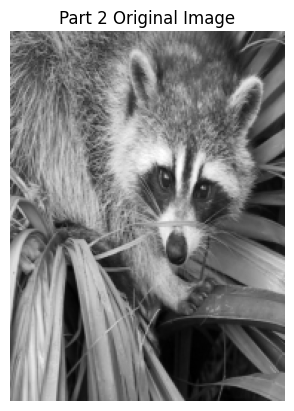

Original data matrix:
[[0.47227077 0.52422388 0.42880058 ... 0.63301411 0.57168432 0.48479152]
 [0.47070796 0.46001478 0.33095939 ... 0.6012117  0.44775357 0.46164304]
 [0.37190717 0.54034412 0.36618135 ... 0.51238841 0.45452946 0.47279532]
 ...
 [0.48846496 0.49655758 0.58565501 ... 0.55265223 0.56049829 0.56181974]
 [0.45868868 0.50307292 0.58704478 ... 0.5630549  0.56214717 0.5613292 ]
 [0.46616308 0.52722329 0.57546047 ... 0.52123712 0.55859952 0.56052172]]

Centered data matrix:
[[-0.04708659  0.01744557 -0.0637145  ...  0.24179673  0.17945805
   0.09287559]
 [-0.0486494  -0.04676353 -0.16155569 ...  0.20999432  0.0555273
   0.06972712]
 [-0.14745019  0.03356581 -0.12633373 ...  0.12117103  0.06230319
   0.0808794 ]
 ...
 [-0.0308924  -0.01022073  0.09313993 ...  0.16143485  0.16827202
   0.16990381]
 [-0.06066868 -0.00370539  0.0945297  ...  0.17183752  0.16992089
   0.16941327]
 [-0.05319428  0.02044498  0.08294539 ...  0.13001974  0.16637325
   0.16860579]]

U matrix (Principal

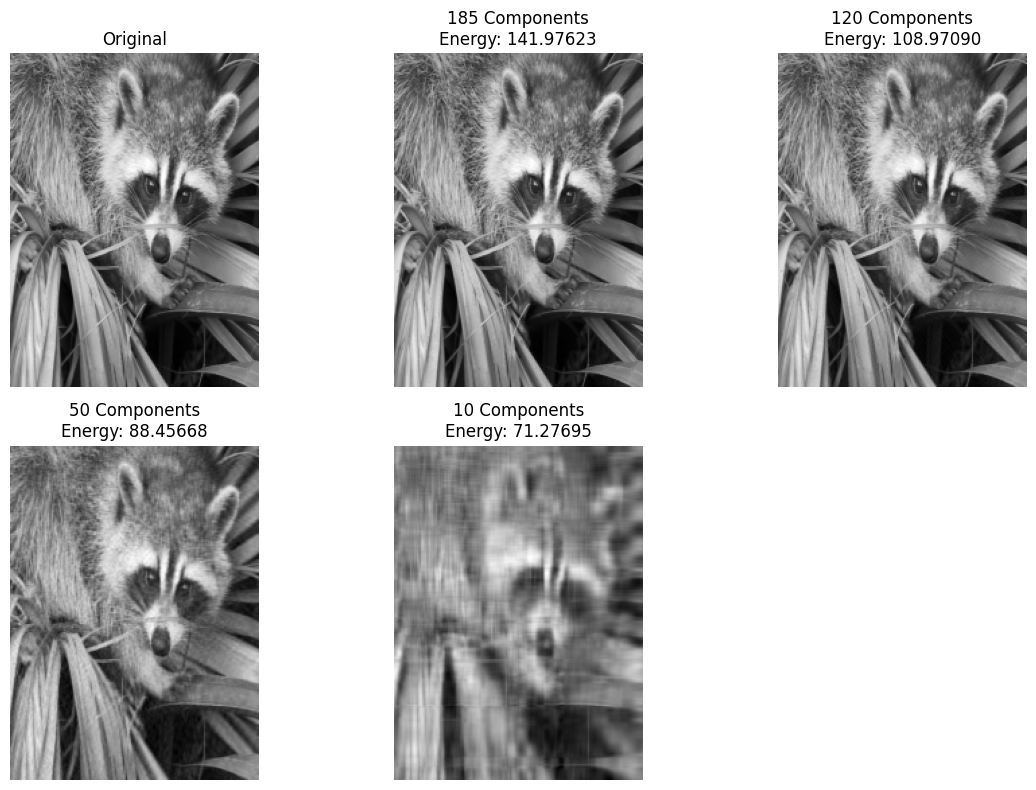

In [11]:
def second_part(image, output_path):
    max_components = min(image.shape)
    components = [max_components, 120, 50, 10]
    reconstructed_images = []
    variances_explained = []

    for n in components:
        reconstructed_image, explained_variance = pca_reconstruct(image, n)
        reconstructed_images.append(reconstructed_image)
        variances_explained.append(explained_variance)

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    for i, img in enumerate(reconstructed_images, 2):
        plt.subplot(2, 3, i)
        plt.imshow(img, cmap='gray')
        plt.title(f'{components[i-2]} Components\nEnergy: {variances_explained[i-2][i]:.5f}')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(output_path, format='png', dpi=300)  
    plt.show()

image_resized = get_image()
output_path = "./ex3task1-2.png"
second_part(image_resized, output_path)

In [12]:

#-----3rd Part-----

# Load the data
data3 = pd.read_csv('./data_DMAP_PCA_vadere.txt', sep=' ')

def plot_pedestrian_path(data, pedestrian_index, save_path):
    
    x_column = 2 * pedestrian_index - 2  
    y_column = 2 * pedestrian_index - 1  

    x_coordinates = data.iloc[:, x_column]
    y_coordinates = data.iloc[:, y_column]

    plt.figure(figsize=(10, 6))
    plt.plot(x_coordinates, y_coordinates)
    plt.title(f"Trajectory of Pedestrian {pedestrian_index}")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.savefig(save_path)
    plt.show()

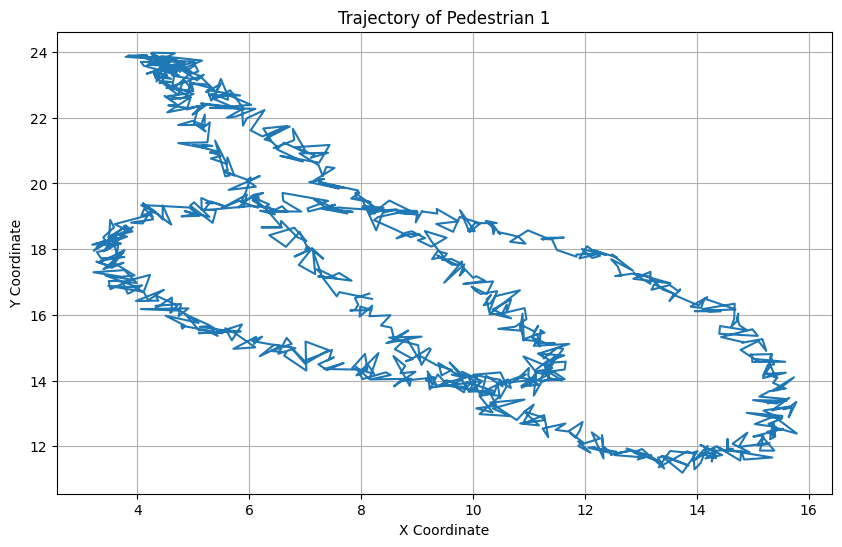

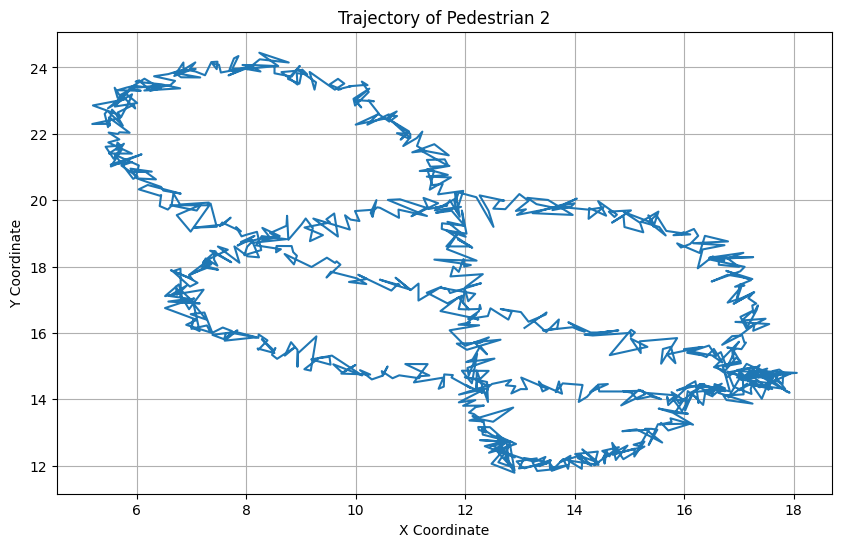

Original data matrix:
     7.682745903224077466e+00  1.659013494052253535e+01  \
0                    8.145535                 16.648409   
1                    7.887370                 16.508989   
2                    7.946284                 16.306714   
3                    7.890591                 16.154034   
4                    7.803971                 16.131706   
..                        ...                       ...   
994                  7.393817                 17.112138   
995                  7.273454                 17.219058   
996                  7.563274                 16.563429   
997                  7.608831                 16.691757   
998                  8.193473                 16.483487   

     1.348382465124134200e+01  1.651630336239929875e+01  \
0                   13.277208                 16.328543   
1                   13.481755                 16.028657   
2                   13.712739                 16.406934   
3                   13.680053    

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (6,) + inhomogeneous part.

In [22]:

plot_pedestrian_path(data3, 1, './ex3task1-3-1.png')
plot_pedestrian_path(data3, 2, './ex3task1-3-2.png')

# Perform PCA with 2 components
# pca_2 = PCA(n_components=2)  
# transformed_data_2 = pca_2.fit_transform(data3)
# energy2 = pca_2.explained_variance_ratio_
# overall_energy2 = np.sum(energy2)
# print(f"For part3, PCA with 2 components, each component explains: {energy2}")
# print(f"The overall explained variance is: {overall_energy2}")
total_energy, explained_variance, centered_data, U, S, Vt = pca_def(data3, 2)
print(f"For part3, PCA with 2 components, each component explains: {total_energy}")
print(f"The overall explained variance is: {explained_variance}")


# Increase the number of components if necessary
required_components = 2  # Starting with 2 components
if (explained_variance < 0.9).any:
    for n_components in range(3, 31):
        # pca_n = PCA(n_components=n_components)
        # pca_n.fit(data3)
        # cumulative_variance = np.cumsum(pca_n.explained_variance_ratio_)
        explained_variance = pca_def(data3, n_components)
        cumulative_variance = np.cumsum(explained_variance)

        if cumulative_variance[-1] >= 0.9:
            required_components = n_components
            print(f"Number of components needed to capture >90% of the variance: {n_components}")
            break

# Perform PCA with the required number of components
# pca_final = PCA(n_components=required_components)  
# transformed_data_final = pca_final.fit_transform(data3)
# energy_final = pca_final.explained_variance_ratio_
# overall_energy_final = np.sum(energy_final)
# print(f"For {required_components} components, each component explains: {energy_final}")
# print(f"The overall explained variance is: {overall_energy_final}")
total_energy, explained_variance, centered_data, U, S, Vt = pca_def(data3, required_components)
print(f"For {required_components} components, each component explains: {total_energy}")
print(f"The overall explained variance is: {explained_variance}")